In [94]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.metrics import confusion_matrix

In [43]:
#load flat file dataset & select columns needed for analysis
telecom_data = pd.read_csv('/Volumes/Editing/Bellevue Univ/Masters in Data Science/DSC 680 Applied Data Science/Project 1/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [44]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleaning

In [45]:
# Count of rows/columns
print(telecom_data.shape)

(7043, 21)


In [46]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
telecom_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [48]:
telecom_data['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [49]:
telecom_data['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [50]:
# Convert Total Charges to Numeric data type to determine nulls
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')
telecom_data['MonthlyCharges'] = pd.to_numeric(telecom_data['MonthlyCharges'], errors='coerce')

In [51]:
# Count of missing values 
telecom_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

11 Null values found

In [52]:
# Impute Using tenure × MonthlyCharges
telecom_data.loc[telecom_data['TotalCharges'].isna(), 'TotalCharges'] = (
    telecom_data.loc[telecom_data['TotalCharges'].isna(), 'tenure'] *
    telecom_data.loc[telecom_data['TotalCharges'].isna(), 'MonthlyCharges'])

In [14]:
# Final Check to verify missing values 
telecom_data['TotalCharges'].isna().sum()

np.int64(0)

In [53]:
telecom_data.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

EDA 

In [54]:
telecom_data['TotalCharges'] = pd.to_numeric(telecom_data['TotalCharges'], errors='coerce')

In [56]:
# Drop the customer ID column
telecom_data.drop('customerID', axis=1, inplace=True)

KeyError: "['customerID'] not found in axis"

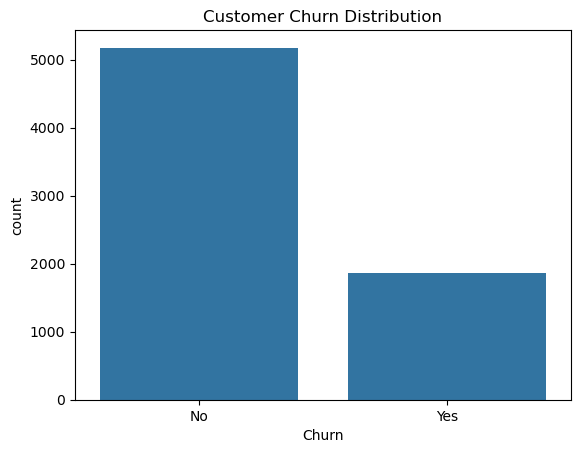

In [57]:
# Visualize churn
sns.countplot(data=telecom_data, x='Churn')
plt.title("Customer Churn Distribution")
plt.show()

The dataset shows class imbalance, with more customers staying than leaving. This is important for modeling decisions later.

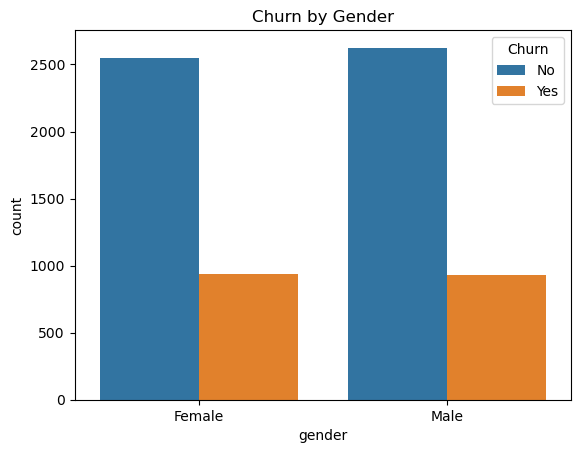

In [58]:
# Churn by Gender 
sns.countplot(data=telecom_data, x='gender', hue='Churn')
plt.title("Churn by Gender")
plt.show()

Churn rates appear similar across genders, suggesting gender alone is not a strong predictor.

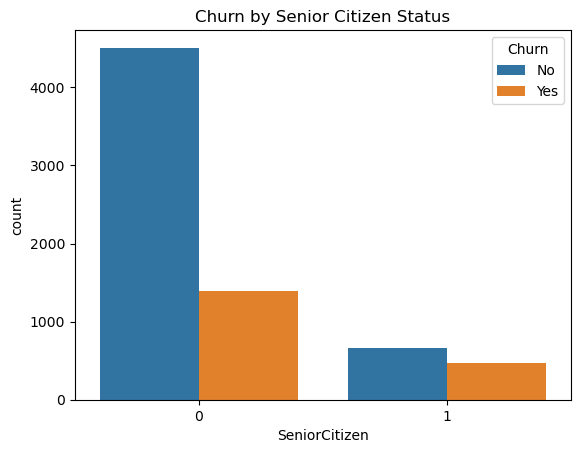

In [59]:
# Churn by Senior Citizen Status
sns.countplot(data=telecom_data, x='SeniorCitizen', hue='Churn')
plt.title("Churn by Senior Citizen Status")
plt.show()

Senior citizens show a noticeably higher churn rate compared to non-senior customers.

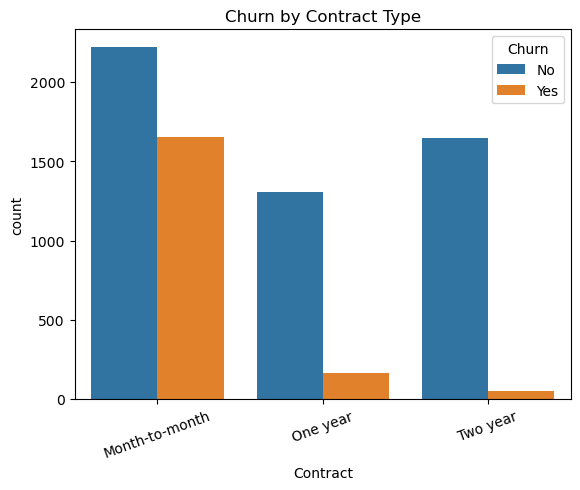

In [60]:
# Churn by contract type 
sns.countplot(data=telecom_data, x='Contract', hue='Churn')
plt.xticks(rotation=20)
plt.title("Churn by Contract Type")
plt.show()

Month-to-month contracts have significantly higher churn compared to one-year and two-year contracts.

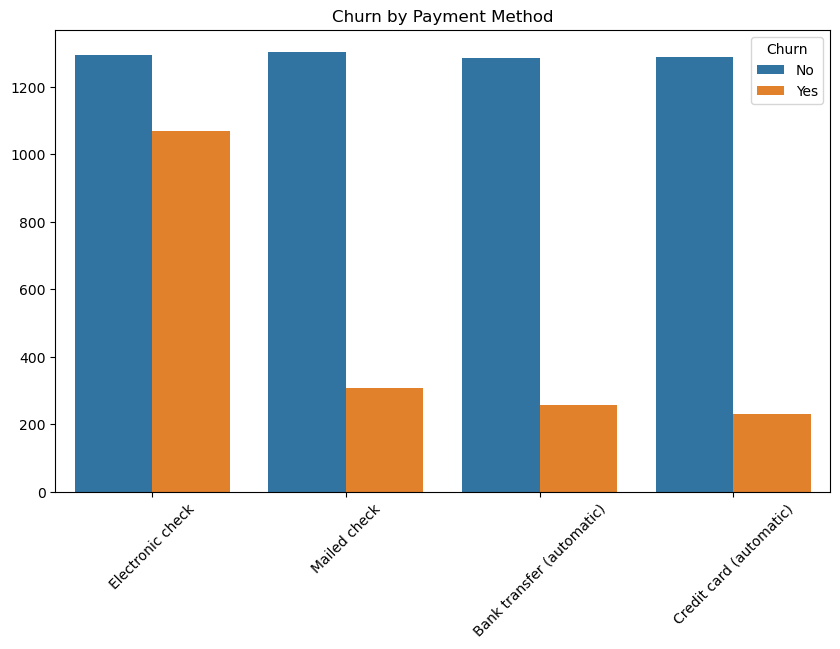

In [ ]:
# Churn by Payment Method
plt.figure(figsize=(10,6))
ax = sns.countplot(data=telecom_data, x='PaymentMethod', hue='Churn')
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
# Remove the axis label
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()


Customers using electronic checks churn more frequently than those using automatic payments.

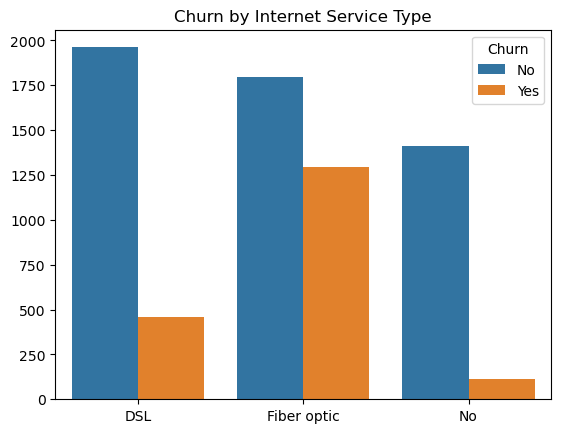

In [64]:
ax = sns.countplot(data=telecom_data, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service Type")
# Remove the axis label
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

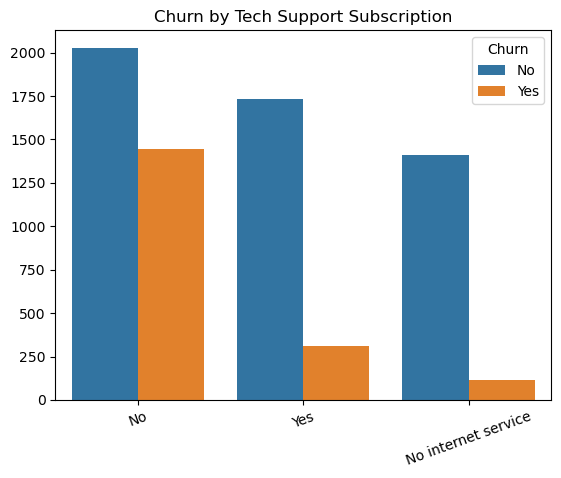

In [65]:
ax = sns.countplot(data=telecom_data, x='TechSupport', hue='Churn')
plt.xticks(rotation=20)
plt.title("Churn by Tech Support Subscription")
# Remove the axis label
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

Customers without tech support churn at a much higher rate, suggesting support services improve retention.

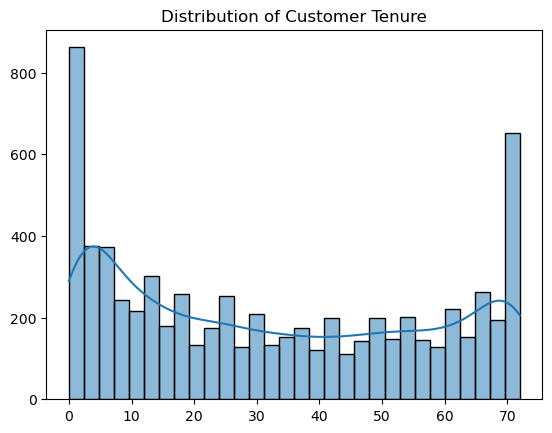

In [66]:
ax = sns.histplot(telecom_data['tenure'], bins=30, kde=True)
plt.title("Distribution of Customer Tenure")
# Remove the axis label
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

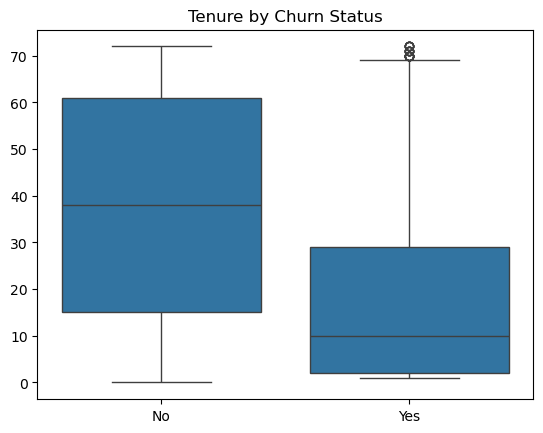

In [67]:
ax = sns.boxplot(data=telecom_data, x='Churn', y='tenure')
plt.title("Tenure by Churn Status")
# Remove the axis label
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

Customers who churn tend to have much shorter tenure.

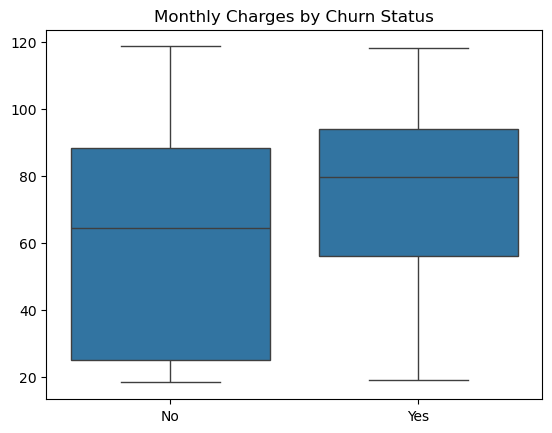

In [ ]:
# Monthly Charges vs Churn
ax = sns.boxplot(data=telecom_data, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges by Churn Status")
# Remove the axis label
ax.set_ylabel('')
ax.set_xlabel('')
plt.show()

Customers with higher monthly charges are more likely to churn.

In [69]:
# Chrun Correlation analysis
tc_corr = telecom_data.copy()
tc_corr['Churn'] = tc_corr['Churn'].map({'Yes': 1, 'No': 0})

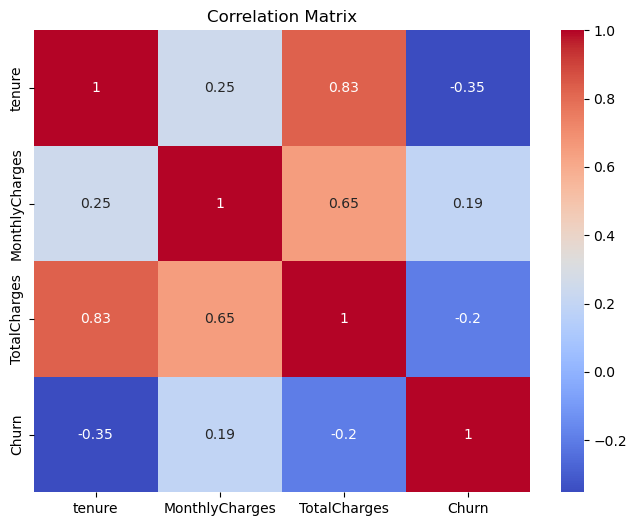

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(tc_corr[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Key Findings:
Tenure is strongly negatively correlated with churn. Monthly charges show a positive correlation with churn

Key Takeaways
* Customers on month-to-month contracts are the most likely to churn
* Short-tenure customers are significantly more likely to leave
* Higher monthly charges are associated with higher churn
* Customers lacking support services (e.g., tech support) churn more often
* The dataset exhibits class imbalance, which must be addressed during modeling

Telco Customer Churn Prediction

In [71]:
# Strip whitespace from categorical columns
for col in telecom_data.select_dtypes(include='object').columns:
    telecom_data[col] = telecom_data[col].str.strip()

In [72]:
# Separate Features and Target
X = telecom_data.drop('Churn', axis=1)
y = telecom_data['Churn'].map({'Yes': 1, 'No': 0})

In [73]:
assert y.isna().sum() == 0, "Target variable contains NaNs"
assert X.isna().sum().sum() == 0, "Feature matrix contains NaNs"

In [74]:
# Train, Test, Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [75]:
# Feature type identification
categorical_features = X.select_dtypes(include='object').columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [76]:
# Column transformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

In [77]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ))
])

In [78]:
# Train and evaluate
log_reg_pipeline.fit(X_train, y_train)

y_pred = log_reg_pipeline.predict(X_test)
y_prob = log_reg_pipeline.predict_proba(X_test)[:, 1]

In [79]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

ROC-AUC: 0.8417499806246609


Overall Performance
* Accuracy: 74%
* ROC-AUC: 0.84 → Strong discriminative power

Even though accuracy is moderate, the ROC-AUC indicates the model is very good at ranking customers by churn risk.

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

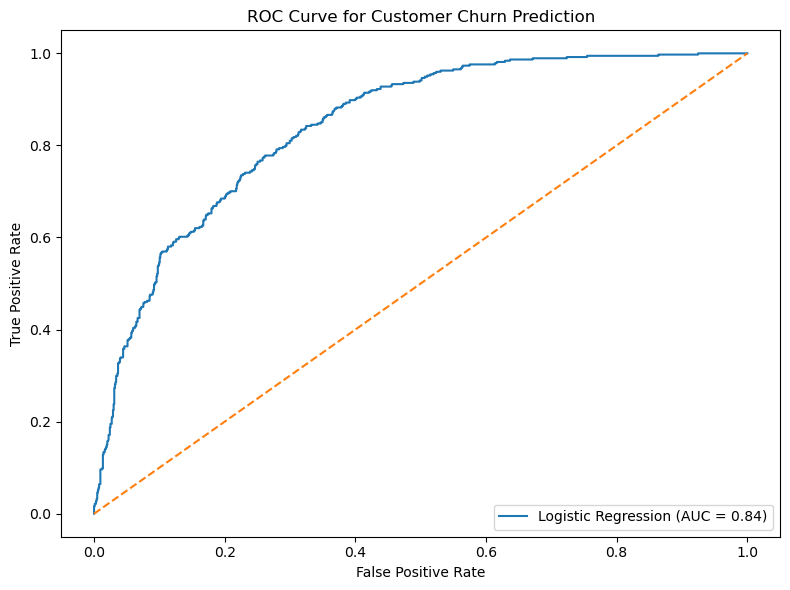

In [81]:
# Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Customer Churn Prediction')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [85]:
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(
        random_state=42,
        class_weight="balanced"
    ))
])

In [86]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

In [87]:
models = {
    "Logistic Regression": log_reg_pipeline,
    "Decision Tree": dt_pipeline,
    "Random Forest": rf_pipeline
}

results = []


In [90]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

In [91]:
# Comparison table
comparison_df = pd.DataFrame(results)

comparison_df = comparison_df.round(3)

comparison_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.739,0.505,0.783,0.614,0.842
1,Decision Tree,0.742,0.514,0.505,0.509,0.667
2,Random Forest,0.786,0.625,0.487,0.547,0.823


In [92]:
y_pred = log_reg_pipeline.predict(X_test)

In [95]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

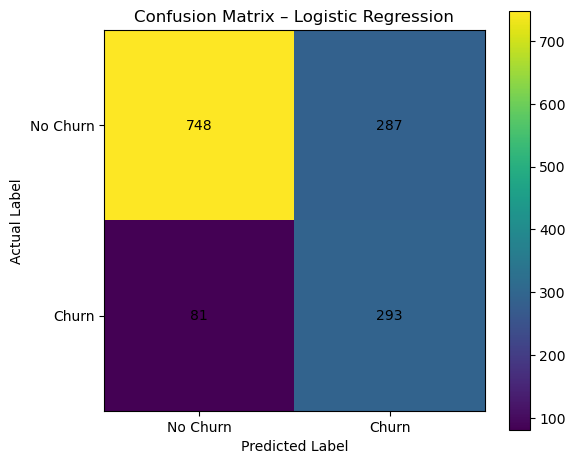

In [96]:
plt.figure(figsize=(6,5))
plt.imshow(cm)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ["No Churn", "Churn"])
plt.yticks(tick_marks, ["No Churn", "Churn"])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.tight_layout()
plt.show()